In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf,keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [4]:
train_data=pd.read_csv('E:\ONT-Classification\Datasets\EU_train_class.csv')
test_data=pd.read_csv('E:\ONT-Classification\Datasets\EU_test_class.csv')

In [5]:
train_data.shape

(8722, 307)

In [6]:
test_data.head(5)

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_Delta_69,GSNR_Delta_70,GSNR_Delta_71,GSNR_Delta_72,GSNR_Delta_73,GSNR_Delta_74,GSNR_Delta_75,GSNR_Delta_76,GSNR_Delta_1,GSNR_class
0,0.000000,0.000000,0.000007,0.000007,0.000007,0.000000,0.000007,0.0,0.000007,0.0,...,-13.774944,76.420186,76.973044,77.437920,78.127092,-16.022501,80.294749,83.797208,85.178047,1
1,0.000000,0.000007,0.000000,0.000007,0.000000,0.000007,0.000000,0.0,0.000000,0.0,...,76.286340,-16.140680,76.973044,77.437920,-11.417882,79.023288,80.294749,83.797208,85.178047,1
2,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.0,0.000007,0.0,...,76.286340,76.420186,-14.018933,77.437920,78.127092,79.023288,-5.217650,0.683095,85.178047,1
3,0.000007,0.000007,0.000007,0.000007,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,-0.123243,2.755271,2.321344,-1.633296,78.127092,79.023288,80.294749,83.797208,7.086314,0
4,0.000000,0.000000,0.000007,0.000000,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,76.286340,76.420186,-1.326394,2.527156,6.096186,5.233024,-0.895690,83.797208,85.178047,1


In [7]:
X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]

In [8]:
y_train[76]

0

In [9]:
X_test=test_data.iloc[:,:-1]
y_test=test_data.iloc[:,-1]

In [10]:
y_test[76]

1

In [11]:
#=========converting to array===================
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
#=========reshaping=============================
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
#===========printing Shapes======
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8722, 306)
(8722, 1)
(7579, 306)
(7579, 1)


In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
model=tf.keras.Sequential([
tf.keras.layers.Dense(256,activation='relu',input_shape=(X_train.shape[1],),kernel_initializer='he_normal'),
tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(32,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(16,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer='he_normal')
],name='Teacher')

In [12]:
model.summary()

Model: "Teacher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               78592     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 122,369
Trainable params: 122,369
Non-trainab

In [13]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model_history=model.fit(X_train,y_train,epochs=100,batch_size=X_train.shape[0],validation_data=(X_test,y_test))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8186 - accuracy: 0.4097 - val_loss: 0.7150 - val_accuracy: 0.5261
Epoch 2/100
1/1 [==============================] - 0s 116ms/step - loss: 0.6925 - accuracy: 0.5892 - val_loss: 0.6628 - val_accuracy: 0.6226
Epoch 3/100
1/1 [==============================] - 0s 139ms/step - loss: 0.6608 - accuracy: 0.6399 - val_loss: 0.6507 - val_accuracy: 0.6440
Epoch 4/100
1/1 [==============================] - 0s 222ms/step - loss: 0.6501 - accuracy: 0.6497 - val_loss: 0.6417 - val_accuracy: 0.6509
Epoch 5/100
1/1 [==============================] - 0s 159ms/step - loss: 0.6423 - accuracy: 0.6532 - val_loss: 0.6355 - val_accuracy: 0.6598
Epoch 6/100
1/1 [==============================] - 0s 102ms/step - loss: 0.6371 - accuracy: 0.6565 - val_loss: 0.6302 - val_accuracy: 0.6662
Epoch 7/100
1/1 [==============================] - 0s 103ms/step - loss: 0.6336 - accuracy: 0.6595 - val_loss: 0.6200 - val_accuracy: 0.6770
Epoch 8/100
1/1 

In [15]:
model.evaluate(X_test, y_test, verbose=1)

237/237 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9877


[0.059820756316185, 0.9877292513847351]

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

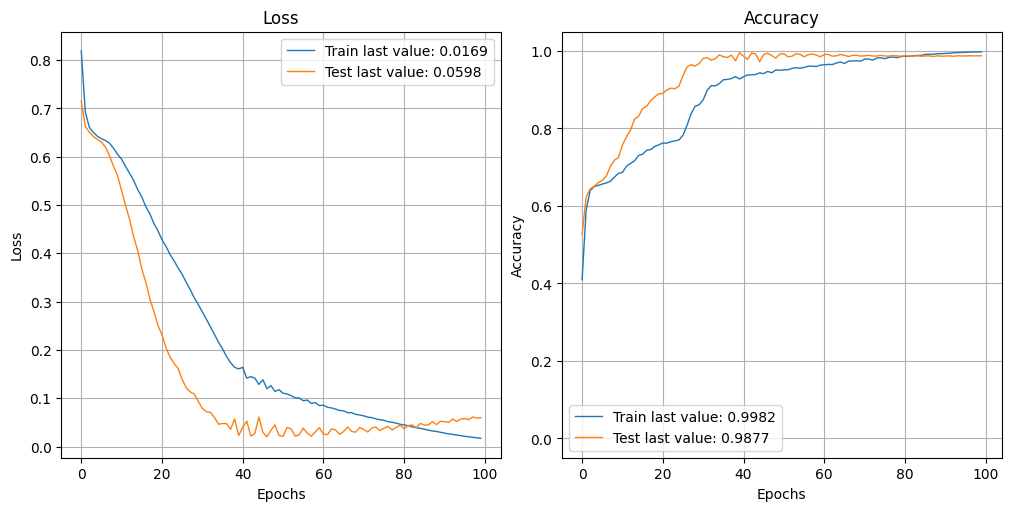

In [16]:
from plot_keras_history import plot_history
plot_history(model_history,show_standard_deviation=False,show_average=True)

In [17]:
y_pred=model.predict(X_test)
y_pred=np.round(y_pred)
report = classification_report(y_test, y_pred)
print(report)

237/237 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2635
           1       0.98      1.00      0.99      4944

    accuracy                           0.99      7579
   macro avg       0.99      0.98      0.99      7579
weighted avg       0.99      0.99      0.99      7579



In [2]:
#model.save("Teacher-Model.h5")

Checking Again EU Model


In [16]:
eu_model= keras.models.load_model('EU-MODEL.h5')

In [17]:
eu_model.summary()

Model: "Teacher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               78592     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 122,369
Trainable params: 122,369
Non-trainab

In [18]:
eu_model.evaluate(X_test, y_test, verbose=1)

237/237 [==============================] - 0s 996us/step - loss: 0.0598 - accuracy: 0.9877


[0.059820756316185, 0.9877292513847351]